# AIT 526: Lab 1

- Hamaad Zuberi
- Feb 2th, 2025

## Task 1: Text Preprocessing and Basic Analysis with NLTK
### 1.1 Load one text file.

In [1]:
fo = open("Harry Potter Book 1.txt", 'r', encoding='utf-8')
mytext = fo.read()
# print(mytext)

### 1.2 Tokenize sentences and words. Print lens of sentences and tokens and only print the first 20 words

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
sentences = sent_tokenize(mytext)
words = word_tokenize(mytext)
print("# of sentences: ", len(sentences))
print("# of words after word tokenizing: ", len(words))
print(words[:20])

# of sentences:  6394
# of words after word tokenizing:  98781
['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


### 1.3 Remove punctuations. Only print the first 20 words.

In [3]:
from nltk.tokenize import RegexpTokenizer
toeknizer = RegexpTokenizer(r'\w+')
tokens = toeknizer.tokenize(mytext.lower())
print("# of words after punctuation removing: ", len(tokens))
print(tokens[:20])

# of words after punctuation removing:  80646
['harry', 'potter', 'and', 'the', 'sorcerer', 's', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four']


### 1.4 Remove stop words and count the cleaned words

In [4]:
from nltk.corpus import stopwords
tokens = [token for token in tokens if token not in stopwords.words('english')]
print("# of words without stop words: ", len(tokens))
print(tokens[:20])

freq_dist = nltk.FreqDist(tokens)
print(freq_dist)

# of words without stop words:  40785
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']
<FreqDist with 5628 samples and 40785 outcomes>


### 1.5 Lemmatize the cleaned words and count the lemmatized words. What’s different from 1.4? Please clearly explain.

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for token in tokens:
    lemmatized_tokens.append(lemmatizer.lemmatize(token))

freq_dist = nltk.FreqDist(lemmatized_tokens)
print(freq_dist)

<FreqDist with 5110 samples and 40785 outcomes>


The sample count, i.e., unique words, in this result is lower than the previous count in 1.4. It seems that all words that were variations of the same word have been converted to their base form.

### 1.6 Calculate the word distribution and plot and list only top 15 words.

[('harry', 1327), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 270), ('one', 269), ('back', 264), ('know', 233), ('get', 203), ('got', 199), ('could', 198), ('like', 195), ('see', 181), ('professor', 181), ('snape', 172)]


<Axes: xlabel='Samples', ylabel='Counts'>

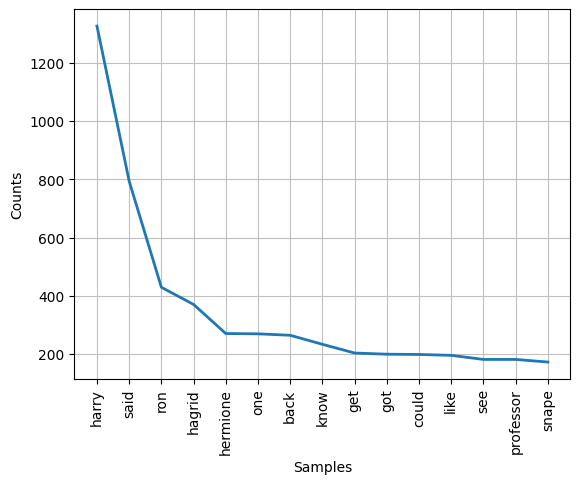

In [6]:
print(freq_dist.most_common(15))
freq_dist.plot(15)

## Task 2: Word Clouds
### 2.1 Follow the wordcloud simple example to generate the word cloud without stopwords directly from the original text and show it. Note that you must remove the stopwords.

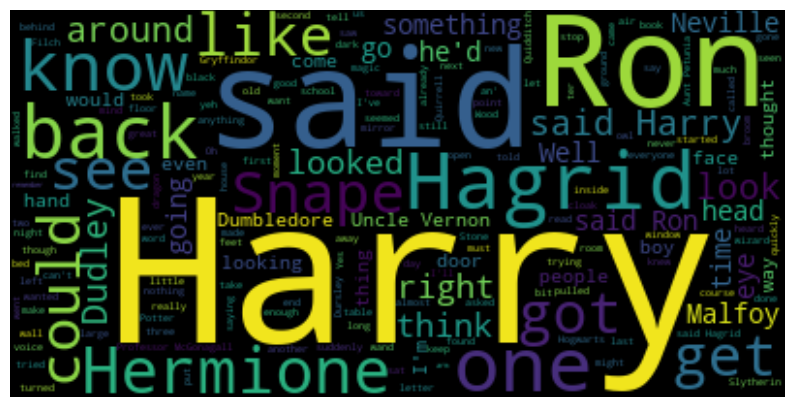

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=stopwords.words('english')).generate(mytext)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.2 Generate the word cloud for the processed data in Task 1 and show the image

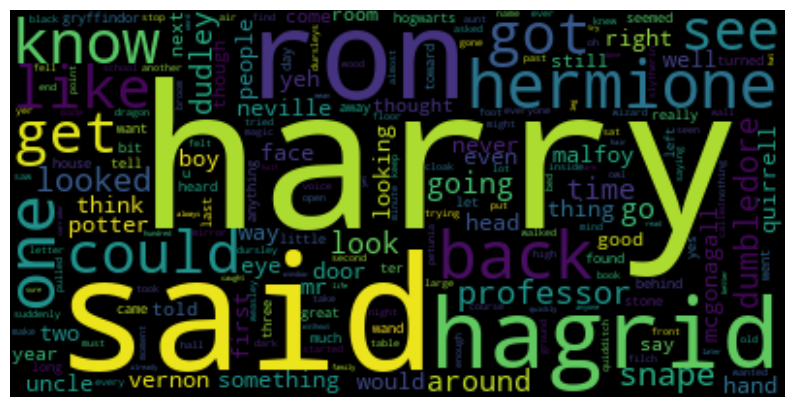

In [8]:
wordcloud = WordCloud().generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.3 Compare the above two wordclouds and what difference do you find? Please clearly explain why.

Both word clouds contain similar words, but clear differences can be observed in the size of certain words. The tokenization processes performed in Task 1 have altered the frequencies of several words, such as “said” and “Hagrid.”
Another major difference is that all words in 2.2 are in lowercase, whereas many words, especially nouns, in 2.1 have their first letter capitalized. This is because we explicitly converted words to lowercase in Task 1.
Additionally, words like “he’d” and “I’ll” are absent in 2.2, as the tokenization process has split such contractions into separate words.

## Task 3
### 3.1 Based on your experience with these NLP tasks, please compare with text data processing and numeric data processing.
Text data processing, as seen here, deals with unstructured or semi-structured information, such as sentences or paragraphs. We use techniques such as lemmatization and stop-word removal to convert text into structured information that can be understood by a program. Numeric data processing, on the other hand, deals directly with numbers. It doesn’t require transformation techniques since numerical values are already structured and can be understood by computers directly.